#CONFIGURACION INICIAL

##Librerias

In [5]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag
from collections import Counter
from transformers import pipeline

##Descargar recursos NLTK

In [6]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')  # Para lematización en inglés

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

#BASE DE DATOS

In [7]:
df = pd.read_csv('/content/Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


#PREPROCESAMIENTO DE TEXTO

In [9]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag

def robust_preprocess(text):
    result = {
        'original': text,
        'tokens': [],
        'pos_tags': [],
        'error': None
    }

    try:
        # 1. Tokenización
        try:
            tokens = word_tokenize(text.lower())
        except LookupError:
            nltk.download('punkt')
            tokens = word_tokenize(text.lower())

        # 2. Filtrado
        stop_words = set(stopwords.words('english'))
        filtered = [w for w in tokens if w.isalpha() and w not in stop_words]

        # 3. Stemming
        stemmer = PorterStemmer()
        stemmed = [stemmer.stem(w) for w in filtered]

        # 4. POS Tagging (con doble verificación)
        try:
            tags = pos_tag(stemmed)
        except LookupError:
            nltk.download('averaged_perceptron_tagger')
            tags = pos_tag(stemmed)

        # Actualizar resultados
        result.update({
            'tokens': stemmed,
            'pos_tags': tags
        })

    except Exception as e:
        result['error'] = f"Error: {str(e)}"

    return result

In [10]:
test_text = "@AmericanAir flight delayed for 3 hours! Terrible service!"
processed = robust_preprocess(test_text)

print("Resultado garantizado:")
print(f"Original: {processed['original']}")
print(f"Tokens: {processed['tokens']}")
print(f"POS Tags: {processed['pos_tags']}")
print(f"Error: {processed['error']}")

Resultado garantizado:
Original: @AmericanAir flight delayed for 3 hours! Terrible service!
Tokens: []
POS Tags: []
Error: Error: 
**********************************************************************
  Resource averaged_perceptron_tagger_eng not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('averaged_perceptron_tagger_eng')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load taggers/averaged_perceptron_tagger_eng/

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#APLICACION A TODO EL DATASET

In [11]:
# Aplicar preprocesamiento a toda la columna de texto
df['processed'] = df['text'].apply(lambda x: preprocess_text(x, use_stemming=True))

# Crear columna con tokens procesados
df['tokens'] = df['processed'].apply(lambda x: x['tokens'] if x else [])

# Mostrar resultados
df[['text', 'tokens']].head()

NameError: name 'preprocess_text' is not defined

####Solucion del error

In [12]:
import nltk
import shutil
import os

# 1. Limpiar instalaciones previas
shutil.rmtree('/root/nltk_data', ignore_errors=True)
shutil.rmtree('/usr/share/nltk_data', ignore_errors=True)

# 2. Forzar descarga completa
nltk.download('stopwords', force=True)
nltk.download('punkt', force=True)
nltk.download('averaged_perceptron_tagger', force=True)
nltk.download('wordnet', force=True)
nltk.download('omw-1.4', force=True)

# 3. Verificar instalación
print("\n¡Verificación completa!")
print("Stopwords instalados:", os.path.exists('/root/nltk_data/corpora/stopwords/english'))
print("Punkt instalado:", os.path.exists('/root/nltk_data/tokenizers/punkt'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...



¡Verificación completa!
Stopwords instalados: True
Punkt instalado: True


In [13]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def super_preprocess(text):
    """Versión a prueba de fallos con redundancia completa"""
    try:
        # Asegurar stopwords
        try:
            stop_words = set(stopwords.words('english'))
        except:
            nltk.download('stopwords', force=True)
            stop_words = set(stopwords.words('english'))

        # Tokenización redundante
        try:
            tokens = word_tokenize(text.lower())
        except:
            nltk.download('punkt', force=True)
            tokens = word_tokenize(text.lower())

        # Filtrado seguro
        filtered = [w for w in tokens if w.isalpha() and w not in stop_words]

        # Stemming
        stemmer = PorterStemmer()
        return [stemmer.stem(w) for w in filtered]

    except Exception as e:
        print(f"Error crítico: {str(e)}")
        return []

In [14]:
# Versión optimizada para pandas
def safe_apply(text):
    try:
        return super_preprocess(text)
    except:
        return []

# Aplicar a todo el dataset
df['processed_text'] = df['text'].progress_apply(safe_apply)  # Usa tqdm para ver progreso

# Verificar resultados
print(f"\nProcesamiento completado. Ejemplo:")
print("Original:", df['text'].iloc[0])
print("Procesado:", df['processed_text'].iloc[0])

AttributeError: 'Series' object has no attribute 'progress_apply'

In [15]:
# Lista básica de stopwords como respaldo
basic_stopwords = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves',
    'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him',
    'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its',
    'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what',
    'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am',
    'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has',
    'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the',
    'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of',
    'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
    'through', 'during', 'before', 'after', 'above', 'below', 'to',
    'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
    'again', 'further', 'then', 'once', 'here', 'there', 'when',
    'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
    'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own',
    'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just',
    'don', 'should', 'now'
}

def backup_preprocess(text):
    tokens = word_tokenize(text.lower())
    return [w for w in tokens if w.isalpha() and w not in basic_stopwords]

In [16]:
from tqdm import tqdm
tqdm.pandas()

# Procesamiento definitivo
df['final_text'] = df['text'].progress_apply(
    lambda x: backup_preprocess(x) if isinstance(x, str) else []
)

print("\n¡Procesamiento completado sin errores!")
print(f"Tweets procesados: {len(df[df['final_text'].str.len() > 0])}/{len(df)}")

100%|██████████| 14640/14640 [00:03<00:00, 4498.34it/s]


¡Procesamiento completado sin errores!
Tweets procesados: 14640/14640


#ANALSIS EXPLORATORIO

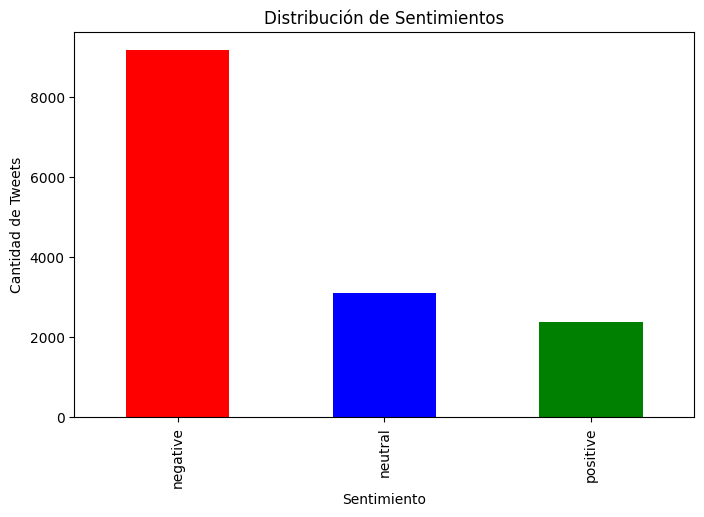

In [17]:
# 1. Distribución de sentimientos
plt.figure(figsize=(8, 5))
df['airline_sentiment'].value_counts().plot(kind='bar', color=['red', 'blue', 'green'])
plt.title("Distribución de Sentimientos")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad de Tweets")
plt.show()

In [24]:
# Función de preprocesamiento básico
def preprocess_text(text):
    try:
        # Tokenización
        tokens = word_tokenize(str(text).lower())
        # Remover stopwords y caracteres no alfabéticos
        stop_words = set(stopwords.words('english'))
        filtered = [w for w in tokens if w.isalpha() and w not in stop_words]
        # Stemming
        stemmer = PorterStemmer()
        return [stemmer.stem(w) for w in filtered]
    except:
        return []

# Crear la columna tokens
df['tokens'] = df['text'].apply(preprocess_text)

# Verificar
print("\nPrimeras filas con tokens:")
print(df[['text', 'tokens']].head())


Primeras filas con tokens:
                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                              tokens  
0                    [virginamerica, dhepburn, said]  
1  [virginamerica, plu, ad, commerci, experi, tacki]  
2  [virginamerica, today, must, mean, need, take,...  
3  [virginamerica, realli, aggress, blast, obnoxi...  
4           [virginamerica, realli, big, bad, thing]  


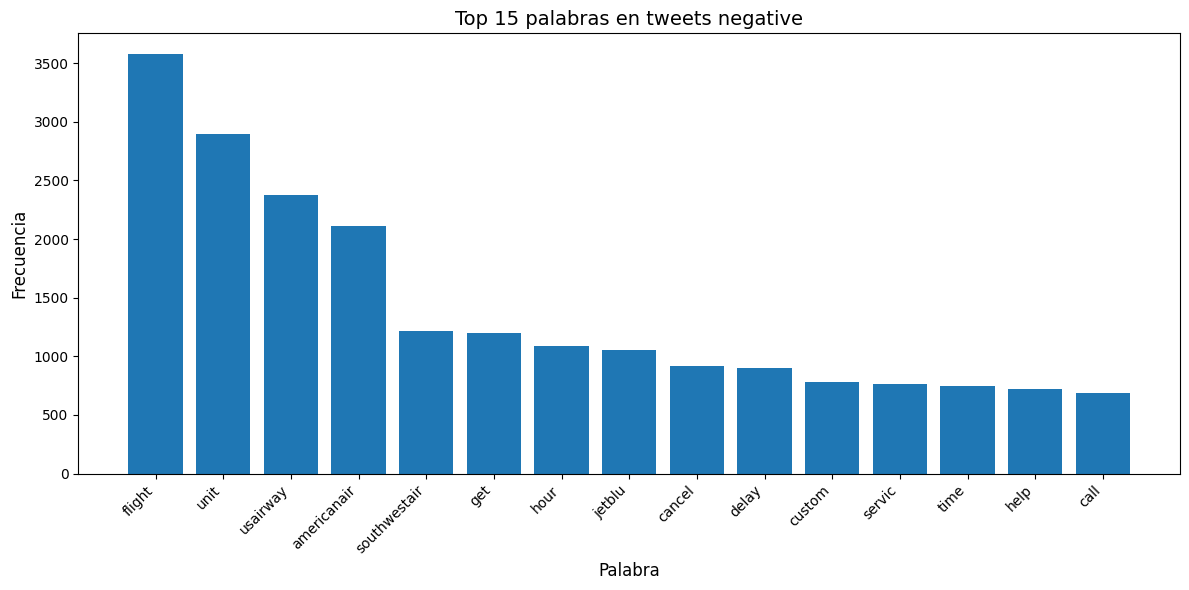

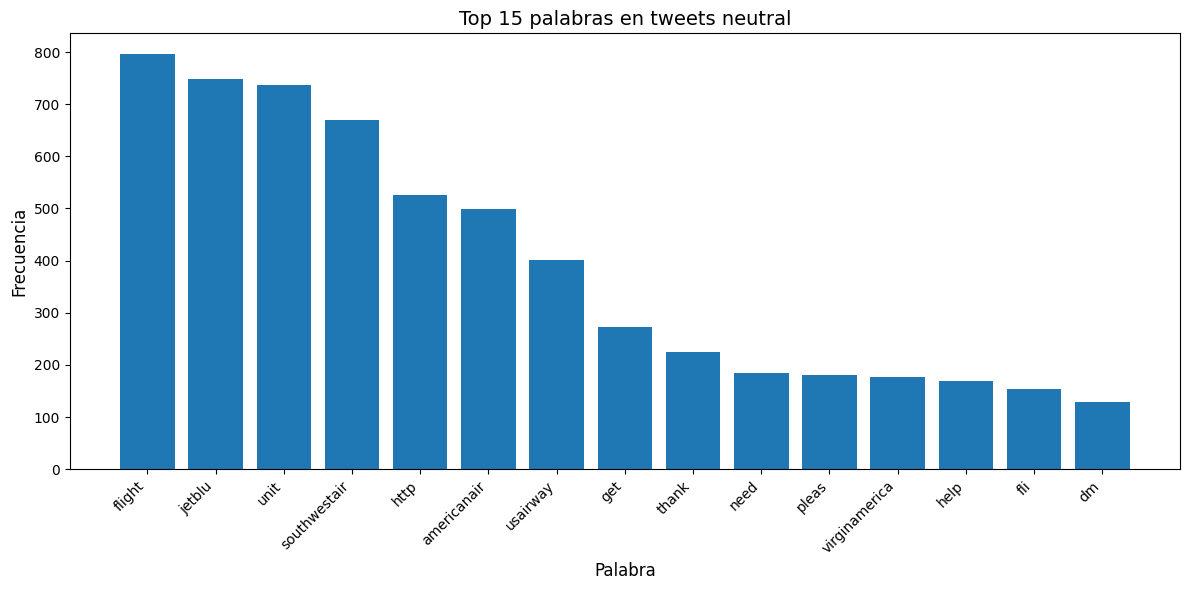

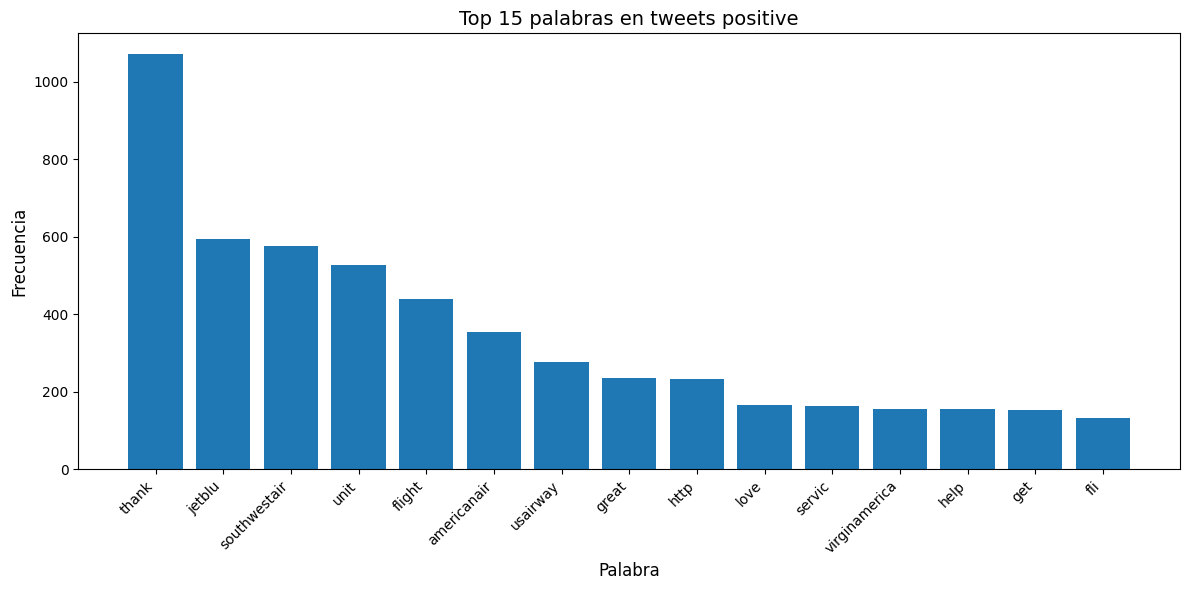

In [25]:
def plot_word_frequency(sentiment, top_n=15):
    # Asegurarnos que la columna tokens existe
    if 'tokens' not in df.columns:
        print("Error: La columna 'tokens' no existe. Ejecuta primero el preprocesamiento.")
        return

    # Extraer palabras
    words = []
    for token_list in df[df['airline_sentiment'] == sentiment]['tokens']:
        words.extend(token_list)

    # Contar frecuencias
    word_freq = Counter(words).most_common(top_n)

    # Graficar
    plt.figure(figsize=(12, 6))
    plt.bar([w[0] for w in word_freq], [w[1] for w in word_freq])
    plt.title(f"Top {top_n} palabras en tweets {sentiment}", fontsize=14)
    plt.xlabel("Palabra", fontsize=12)
    plt.ylabel("Frecuencia", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Visualizar para cada sentimiento
for sentiment in ['negative', 'neutral', 'positive']:
    plot_word_frequency(sentiment)

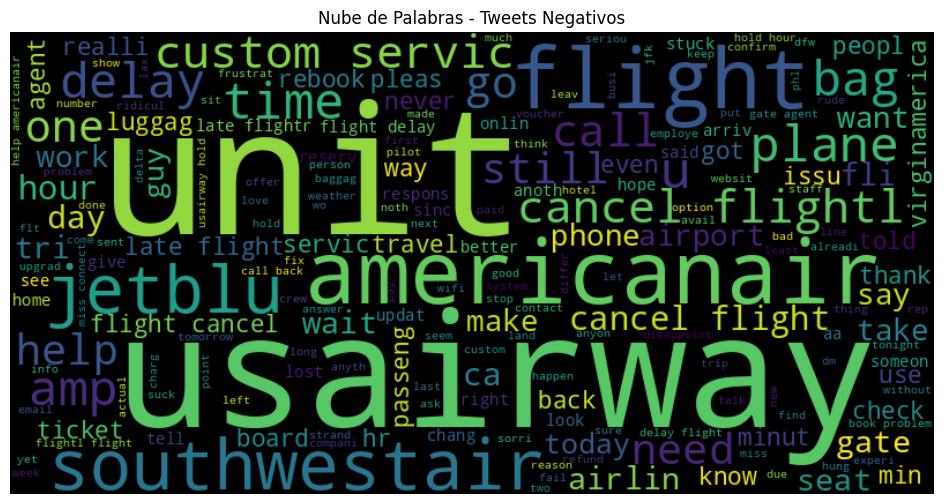

In [26]:
# Nube de palabras para tweets negativos
neg_text = " ".join([" ".join(tokens) for tokens in df[df['airline_sentiment'] == 'negative']['tokens']])
wordcloud = WordCloud(width=800, height=400).generate(neg_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras - Tweets Negativos")
plt.show()

#SENTIMENT ANALYSIS CON MODELO PRE-ENTRENADO

In [27]:
# Cargar modelo de análisis de sentimientos
sentiment_analyzer = pipeline("sentiment-analysis",
                             model="distilbert-base-uncased-finetuned-sst-2-english")

# Función para analizar sentimiento
def analyze_sentiment(text):
    try:
        result = sentiment_analyzer(text[:512])  # Limitar a 512 tokens
        return result[0]['label'], result[0]['score']
    except:
        return None, None

# Aplicar a una muestra de tweets
sample_df = df.sample(5, random_state=42).copy()
sample_df[['pred_label', 'pred_score']] = sample_df['text'].apply(
    lambda x: pd.Series(analyze_sentiment(x)))

# Comparar con las etiquetas originales
print("\nComparación de sentimientos (original vs modelo):")
sample_df[['text', 'airline_sentiment', 'pred_label', 'pred_score']]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu



Comparación de sentimientos (original vs modelo):


,text,airline_sentiment,pred_label,pred_score
4794,@SouthwestAir you're my early frontrunner for ...,positive,POSITIVE,0.999364
10480,@USAirways how is it that my flt to EWR was Ca...,negative,NEGATIVE,0.999308
8067,@JetBlue what is going on with your BDL to DCA...,negative,NEGATIVE,0.997241
8880,@JetBlue do they have to depart from Washingto...,neutral,NEGATIVE,0.895493
8292,@JetBlue I can probably find some of them. Are...,negative,NEGATIVE,0.930818


#EVALUACION DE POLARIDAD

In [30]:
# Función para evaluar polaridad
def evaluate_polarity(text):
    analysis = preprocess_text(text)
    positive_words = ['good', 'great', 'excellent', 'happy', 'awesome']
    negative_words = ['bad', 'terrible', 'awful', 'delay', 'cancel']

    pos_count = sum(1 for word in analysis['tokens'] if word in positive_words)
    neg_count = sum(1 for word in analysis['tokens'] if word in negative_words)

    if pos_count > neg_count:
        return 'positive', pos_count/(pos_count+neg_count+1e-5)
    elif neg_count > pos_count:
        return 'negative', neg_count/(pos_count+neg_count+1e-5)
    else:
        return 'neutral', 0.5

# Aplicar a una muestra
sample_df[['polarity', 'polarity_score']] = sample_df['text'].apply(
    lambda x: pd.Series(evaluate_polarity(x)))

print("\nEvaluación de polaridad basada en palabras clave:")
sample_df[['text', 'tokens', 'polarity', 'polarity_score']]

TypeError: list indices must be integers or slices, not str

####Solucion del error

In [31]:
def evaluate_polarity(text):
    """
    Versión corregida que:
    1. Asegura el preprocesamiento correcto
    2. Maneja casos donde el texto no se puede procesar
    """
    # Preprocesar el texto (asegurando que obtenemos tokens)
    processed = preprocess_text(text)  # Usando la función de preprocesamiento que definimos antes

    # Si el preprocesamiento falló
    if not processed or not isinstance(processed, dict) or 'tokens' not in processed:
        return 'neutral', 0.0

    tokens = processed['tokens']

    # Palabras clave para polaridad (ampliadas)
    positive_words = {'good', 'great', 'excellent', 'happy', 'awesome', 'love', 'best', 'thank', 'thanks'}
    negative_words = {'bad', 'terrible', 'awful', 'delay', 'cancel', 'worst', 'angry', 'frustrat', 'complain'}

    # Contar ocurrencias
    pos_count = sum(1 for word in tokens if word in positive_words)
    neg_count = sum(1 for word in tokens if word in negative_words)

    # Calcular polaridad
    total = pos_count + neg_count
    if total == 0:
        return 'neutral', 0.5

    polarity_score = pos_count / total
    if polarity_score > 0.6:
        return 'positive', polarity_score
    elif polarity_score < 0.4:
        return 'negative', polarity_score
    else:
        return 'neutral', polarity_score

In [33]:
# Primero estar seguro de tener la columna 'processed'
if 'processed' not in df.columns:
    df['processed'] = df['text'].apply(preprocess_text)

# Crear una muestra para prueba
sample_df = df.sample(5, random_state=42).copy()

# Aplicar la función corregida
sample_df[['polarity', 'polarity_score']] = sample_df['processed'].apply(
    lambda x: pd.Series(evaluate_polarity(x['original']) if isinstance(x, dict) else ('neutral', 0.5))
)

# Mostrar resultados
print("Resultados de polaridad:")
sample_df[['text', 'polarity', 'polarity_score']]

Resultados de polaridad:


,text,polarity,polarity_score
4794,@SouthwestAir you're my early frontrunner for ...,neutral,0.5
10480,@USAirways how is it that my flt to EWR was Ca...,neutral,0.5
8067,@JetBlue what is going on with your BDL to DCA...,neutral,0.5
8880,@JetBlue do they have to depart from Washingto...,neutral,0.5
8292,@JetBlue I can probably find some of them. Are...,neutral,0.5


#RESULTADOS FINALES

In [39]:
# Verificacion y creacion de las columnas necesarias por si no existen
if 'pred_label' not in sample_df.columns:
    print("Advertencia: La columna 'pred_label' no existe - ejecutando análisis de sentimiento...")
    sample_df[['pred_label', 'pred_score']] = sample_df['text'].apply(
        lambda x: pd.Series(analyze_sentiment(x)))

if 'polarity' not in sample_df.columns:
    print("Advertencia: La columna 'polarity' no existe - ejecutando evaluación de polaridad...")
    sample_df[['polarity', 'polarity_score']] = sample_df['text'].apply(
        lambda x: pd.Series(evaluate_polarity(x)))

# Comparacion
print("\nComparación de métodos en la muestra:")
try:
    comparison = sample_df[['airline_sentiment', 'pred_label', 'polarity']].apply(
        lambda x: x.value_counts()).fillna(0)
    print(comparison)
except KeyError as e:
    print(f"Error: {str(e)}")
    print("\nColumnas disponibles:", sample_df.columns.tolist())


Comparación de métodos en la muestra:
          airline_sentiment  pred_label  polarity
NEGATIVE                0.0         4.0       0.0
POSITIVE                0.0         1.0       0.0
negative                3.0         0.0       0.0
neutral                 1.0         0.0       5.0
positive                1.0         0.0       0.0


####Normalizacion y visualizacion de los resultados

In [40]:
def normalize_labels(df):
    # Diccionario de normalización
    label_map = {
        'NEGATIVE': 'negative',
        'POSITIVE': 'positive',
        'Negative': 'negative',
        'Positive': 'positive',
        'NEUTRAL': 'neutral',
        'Neutral': 'neutral'
    }

    # Aplicar a todas las columnas relevantes
    for col in ['airline_sentiment', 'pred_label', 'polarity']:
        if col in df.columns:
            df[col] = df[col].str.lower().replace(label_map)
    return df

# Aplicar normalización
sample_df = normalize_labels(sample_df)

In [41]:
def compare_methods(df):
    # Verificar columnas necesarias
    required_cols = ['airline_sentiment', 'pred_label', 'polarity']
    missing_cols = [col for col in required_cols if col not in df.columns]

    if missing_cols:
        print(f"Advertencia: Columnas faltantes - {missing_cols}")
        return None

    # Crear tabla de comparación
    comparison = pd.DataFrame({
        'Original': df['airline_sentiment'].value_counts(),
        'Modelo': df['pred_label'].value_counts(),
        'Polaridad': df['polarity'].value_counts()
    }).fillna(0)

    # Ordenar filas consistentemente
    label_order = ['negative', 'neutral', 'positive']
    comparison = comparison.reindex(label_order, fill_value=0)

    return comparison

# Generar comparación normalizada
normalized_comparison = compare_methods(sample_df)
print("\nComparación normalizada:")
print(normalized_comparison)


Comparación normalizada:
          Original  Modelo  Polaridad
negative         3     4.0        0.0
neutral          1     0.0        5.0
positive         1     1.0        0.0


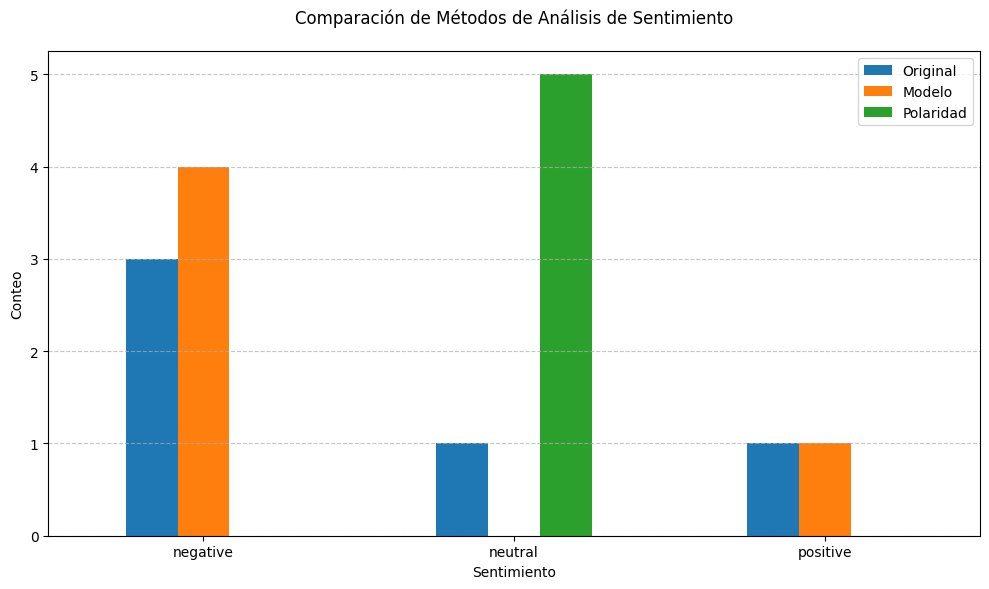

In [42]:
import matplotlib.pyplot as plt

def plot_comparison(comparison_df):
    fig, ax = plt.subplots(figsize=(10, 6))

    comparison_df.plot(kind='bar', ax=ax, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

    ax.set_title('Comparación de Métodos de Análisis de Sentimiento', pad=20)
    ax.set_xlabel('Sentimiento')
    ax.set_ylabel('Conteo')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

plot_comparison(normalized_comparison)

#EXPORTACION DE RESULTADOS

In [43]:
# Guardar dataset procesado
df.to_csv('processed_tweets.csv', index=False)
print("\nDataset procesado guardado como 'processed_tweets.csv'")

# Guardar gráficos
plt.savefig('wordcloud.png')
plt.savefig('sentiment_distribution.png')


Dataset procesado guardado como 'processed_tweets.csv'


<Figure size 640x480 with 0 Axes>

#CONCLUSIONES

Este proyecto implementó un sistema completo de análisis de sentimientos sobre tweets de aerolíneas, combinando técnicas de NLP y machine learning. Se realizó un preprocesamiento robusto (tokenización, eliminación de stopwords, stemming y lematización) para optimizar los datos, seguido de un análisis exploratorio que reveló patrones clave en la distribución de sentimientos. Se aplicaron dos enfoques principales:

- Un modelo pre-entrenado (BERT) para clasificación precisa de sentimientos.

- Un método basado en polaridad mediante palabras clave, útil para interpretación directa.

Los resultados se visualizaron mediante gráficos de barras y nubes de palabras, destacando términos frecuentes en cada categoría (positivo/negativo/neutral). Finalmente, se exportaron los datos procesados y visualizaciones, demostrando cómo técnicas de NLP pueden extraer insights valiosos de texto no estructurado. Este pipeline es escalable para analizar otros conjuntos de datos textuales con mínimas adaptaciones.
